In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GQLEQELAALDQQIAALKQRRAALKWQIQG', 'GQLEQELAALDQQIAALKQRRAALKWQIQG']

In [11]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 30),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['c'], 27),  
]

In [12]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 30, 5.0, 200, 205.6]


In [13]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [14]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [15]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	61   	-881.536	34.8396	-950.983	-832.264
1  	73   	-922.087	18.8892	-950.983	-879.292
2  	79   	-938.405	6.6635 	-952.463	-926.86 
3  	68   	-945.254	5.19007	-955.213	-936.231
4  	64   	-950.342	2.67705	-955.954	-944.465
5  	85   	-953.017	1.49113	-956.004	-950.473
6  	59   	-954.285	1.01625	-956.047	-952.213
7  	63   	-954.878	0.80698	-956.471	-953.415
8  	66   	-955.502	0.55327	-956.471	-954.443
9  	69   	-956.001	0.217384	-956.588	-955.506
10 	59   	-956.161	0.171161	-956.588	-955.917
11 	79   	-956.298	0.127536	-956.588	-956.072
12 	58   	-956.379	0.082406	-956.595	-956.212
13 	67   	-956.411	0.0697375	-956.595	-956.301
14 	81   	-956.427	0.0585151	-956.595	-956.343
15 	71   	-956.448	0.0547446	-956.595	-956.372
16 	50   	-956.456	0.055135 	-956.601	-956.379
17 	79   	-956.461	0.0540715	-956.621	-956.382
18 	70   	-956.468	0.0535379	-956.621	-956.39 
19 	79   	-956.491	0.046824 	-956.621	-956.422
20 	75   	-956.49 	0.046664 	-956.621

In [16]:
optimized_model_ga = opt_ga.best_model

In [17]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-956.6702177402989

In [18]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [19]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

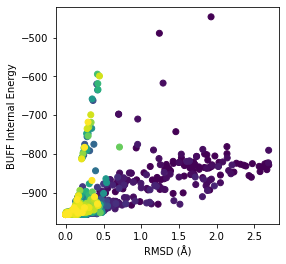

In [20]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('ga.png')

In [21]:
f = open('d_CC-Di_p-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [22]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [23]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	100  	-866.726	44.1716	-953.334	-671.69
1  	100  	-892.716	36.9896	-953.334	-821.471
2  	100  	-908.739	33.4836	-956.045	-828.952
3  	100  	-922.742	26.4889	-956.045	-850.651
4  	100  	-935.691	18.4866	-956.045	-878.276
5  	100  	-944.813	8.30963	-956.359	-910.54 
6  	100  	-947.815	6.02038	-956.436	-926.378
7  	100  	-950.898	3.43366	-956.436	-940.003
8  	100  	-952.6  	2.1205 	-956.436	-946.252
9  	100  	-953.442	1.70784	-956.586	-947.949
10 	100  	-954.179	1.34197	-956.586	-949.813
11 	100  	-954.75 	1.12125	-956.586	-951.689
12 	100  	-955.262	0.914421	-956.586	-952.808
13 	100  	-955.627	0.711718	-956.586	-953.668
14 	100  	-955.911	0.534319	-956.593	-954.167
15 	100  	-956.173	0.291041	-956.651	-955.028
16 	100  	-956.294	0.205955	-956.679	-955.446
17 	100  	-956.398	0.147716	-956.679	-956.016
18 	100  	-956.467	0.115854	-956.744	-956.132
19 	100  	-956.508	0.0936088	-956.744	-956.132
20 	100  	-956.529	0.0782607	-956.744	-956.32 
2

In [24]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-956.7517669484279

In [25]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [26]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

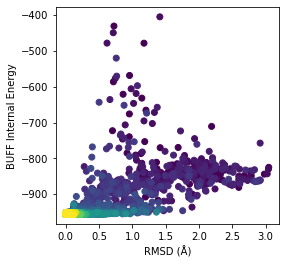

In [27]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('de.png')

In [28]:
f = open('d_CC-Di_p-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [29]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [30]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg    	std    	min     	max     
0  	100  	-842.19	90.7018	-975.486	-475.577
1  	67   	-847.536	104.204	-978.359	-475.577
2  	49   	-859.277	89.7586	-978.359	-504.31 
3  	73   	-841.383	98.5942	-969.147	-267.068
4  	88   	-853.085	100.044	-959.56 	-226.063
5  	84   	-839.477	166.318	-970.54 	39.797  
6  	53   	-835.704	172.203	-972.684	39.797  
7  	58   	-821.801	157.78 	-972.684	39.797  
8  	54   	-836.969	124.227	-972.684	39.797  
9  	66   	-838.034	125.477	-948.749	39.797  
10 	74   	-872.027	88.5299	-959.02 	-267.068
11 	50   	-864.562	98.4191	-965.198	-267.068
12 	30   	-849.49 	119.333	-965.198	-267.068
13 	36   	-844.703	130.176	-965.198	-267.068
14 	42   	-848.035	128.093	-965.198	-267.068
15 	49   	-865.256	118.08 	-984.638	-267.068
16 	62   	-845.76 	89.1472	-984.638	-484.413
17 	79   	-837.563	88.9635	-984.638	-484.413
18 	72   	-842.785	102.66 	-965.03 	-468.984
19 	81   	-879.906	87.2046	-963.459	-468.984
20 	66   	-878.098	96.4066	-964.698	-420.347
21 	35   	-8

In [31]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-984.6380814311435

In [32]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [33]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

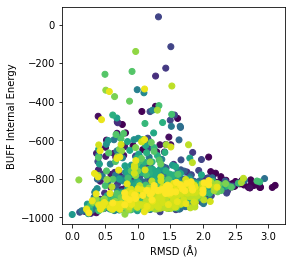

In [34]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('pso.png')

In [35]:
f = open('d_CC-Di_p-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [36]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [37]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-839.636	40.1041	-922.378	-664.004
1  	100  	-869.572	40.0999	-947.672	-731.541
2  	100  	-873.324	65.4563	-955.871	-604.377
3  	100  	-924.75 	25.8283	-954.962	-806.438
4  	100  	-919.207	71.3811	-956.116	-395.281
5  	100  	-950.345	4.11384	-956.418	-933.189
6  	100  	-952.391	2.84447	-956.562	-944.176
7  	100  	-954.051	1.97088	-956.582	-949.626
8  	100  	-954.696	1.84995	-956.578	-950.354
9  	100  	-954.404	2.17787	-956.683	-951.072
10 	100  	-955.357	1.88231	-956.663	-951.161
11 	100  	-954.783	2.34113	-956.706	-951.098
12 	100  	-954.764	2.42031	-956.702	-951.169
13 	100  	-955.258	2.23673	-956.686	-951.167
14 	100  	-955.554	2.08526	-956.696	-951.091
15 	100  	-955.454	2.17202	-956.72 	-951.167
16 	100  	-956.008	1.67637	-956.743	-951.178
17 	100  	-955.899	1.79747	-956.726	-951.177
18 	100  	-955.265	2.32752	-956.749	-951.119
19 	100  	-955.645	2.07239	-956.713	-951.106
20 	100  	-955.703	2.0326 	-956.732	-951.128
21 	100  	

In [38]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-956.7952206115094

In [39]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [40]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

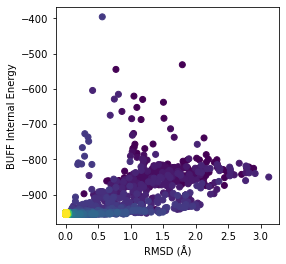

In [41]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('cmaes.png')

In [42]:
f = open('d_CC-Di_p-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)